# Exploratory Data Analysis
---


In [99]:
# Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [100]:
# load data

bbox_df = pd.read_pickle('../data/interim/bbox_df.pkl')
data_entry_df = pd.read_pickle('../data/interim/data_entry_df.pkl')

In [101]:
data_entry_df.head()

,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_img_width,original_img_height,img_pixel_spacing_x,img_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [ ]:
# look at patient id and follow number

Average patient age: 46.87


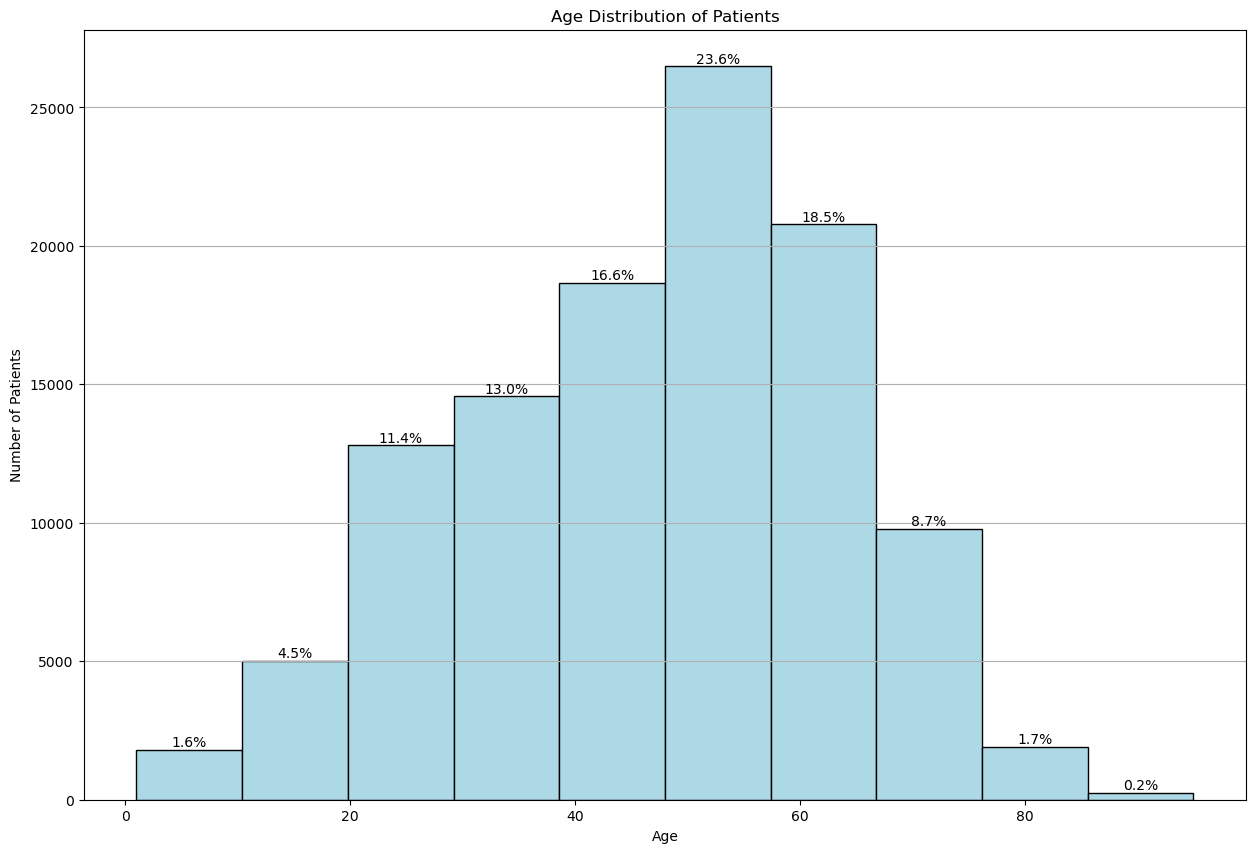

In [ ]:
# age distribution of patients
print(f'Average patient age: {data_entry_df["patient_age"].mean().round(2)}')

plt.figure(figsize=(15,10))
counts, bins, patches = plt.hist(data_entry_df["patient_age"], bins=10, color="lightblue",edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

total = counts.sum()
percentages = [f"{(c/total * 100):.1f}%" for c in counts]

plt.bar_label(patches, labels=percentages)
plt.grid(axis='y')
plt.show()


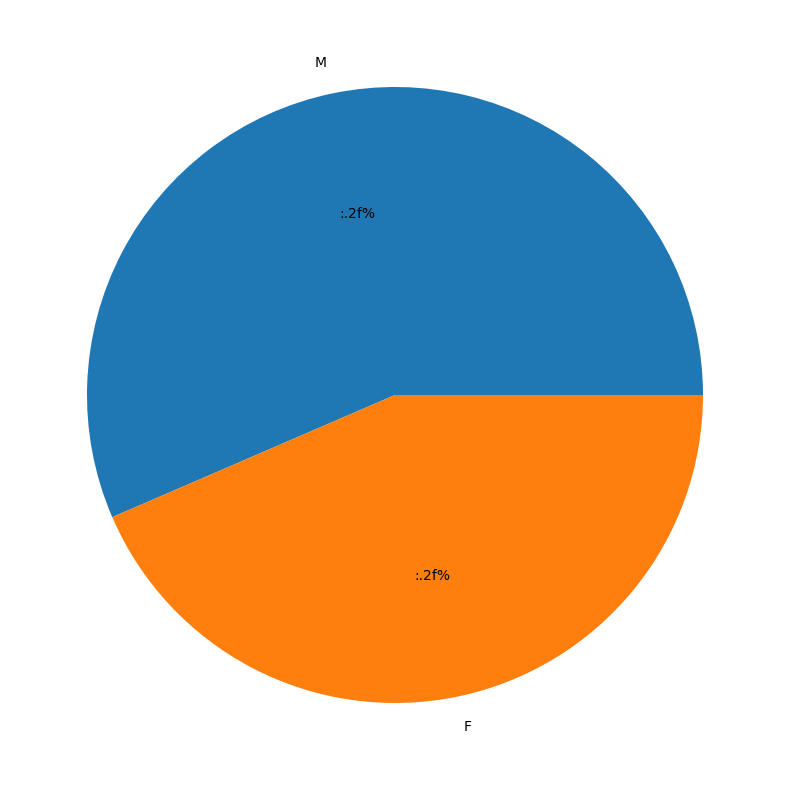

In [122]:
# Patient gender distribution

gender = data_entry_df["patient_gender"].value_counts()

plt.figure(figsize=(15,10))
plt.pie(gender.values, labels=gender.index, autopct=":.2f%%")

plt.show()

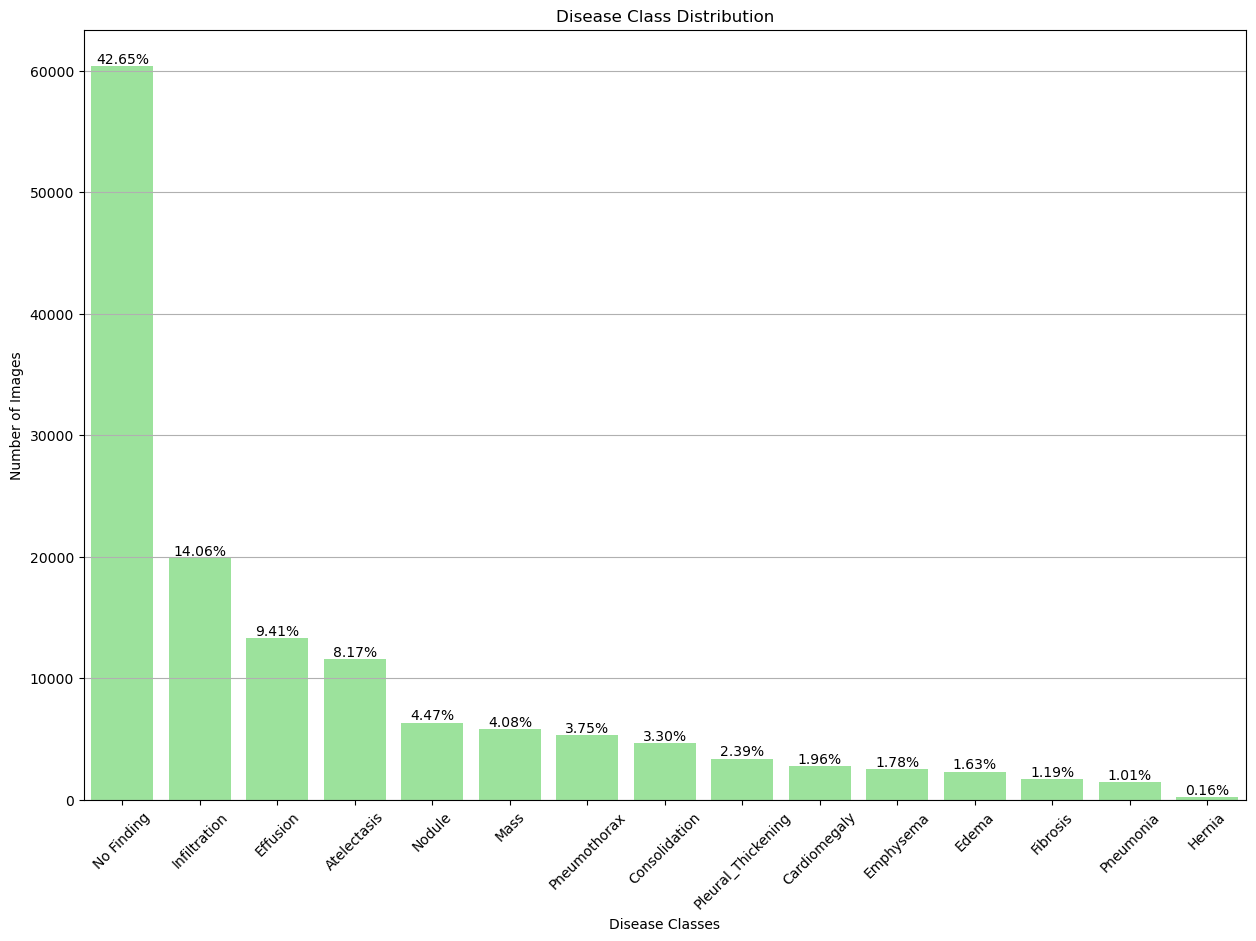

In [103]:
# Distribution of disease classes

labels_exploded = data_entry_df["finding_labels"].str.split('|').explode()
label_counts = labels_exploded.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=label_counts.index, y=label_counts.values, color="lightgreen")
plt.xticks(rotation=45)
plt.title("Disease Class Distribution")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")

total = label_counts.sum()

for index, count in enumerate(label_counts.values):
    percentage = (count/ total) * 100
    plt.text(index, count + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

The distribution of classes is left-skewed with a dominate class ("No Finding"). The gap between the top class the the next may have a large impact on model performance as models tend to bias the majority class. 